<a href="https://colab.research.google.com/github/p1kalys/neural_networks_practice/blob/main/image_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# **1. Vertical and Horizontal Edges**

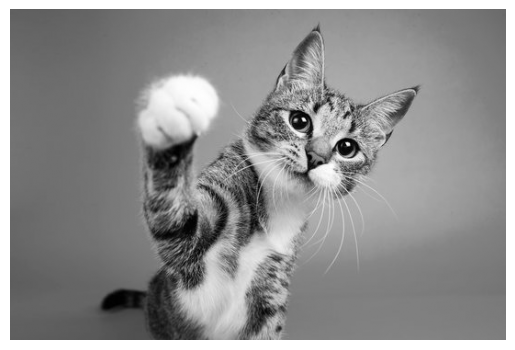

In [39]:
# Load an image using PIL
image_url = "https://t4.ftcdn.net/jpg/02/66/72/41/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("L")

# You can display the image to verify
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [40]:
image = image.resize((256,256)) # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0 # Normalize pixel values

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define vertical and horizontal edge detection filters (Sobel-like)
vertical_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

horizontal_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
], dtype=np.float32)

# Reshape filters for Tensorflow (H, W, in_channels, out_channels)
vertical_filter = vertical_filter.reshape((3, 3, 1, 1))
horizontal_filter = horizontal_filter.reshape((3, 3, 1, 1))

vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1, 1, 1, 1], padding='SAME')
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding='SAME')

# Convert tensors to numpy for visualization
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

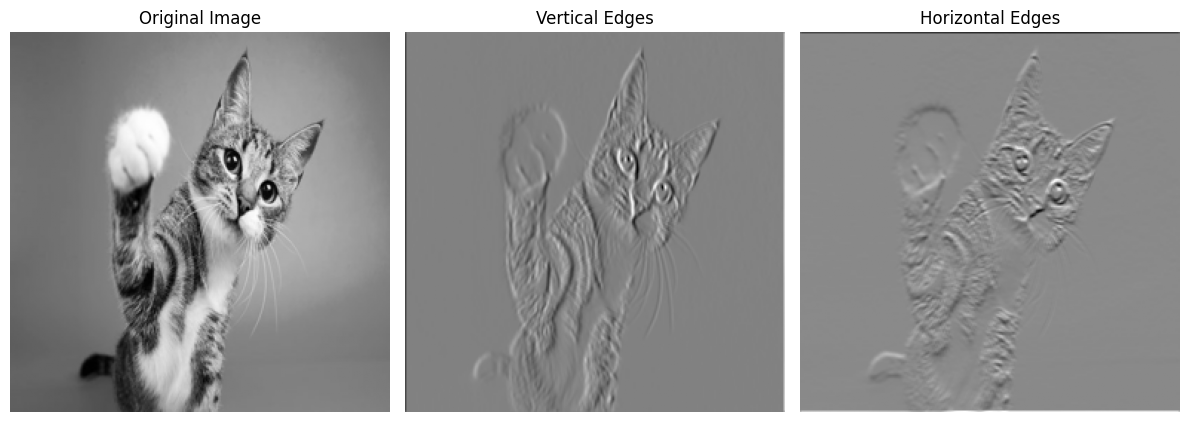

In [41]:
# Plot original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

# **2. Blur Image**

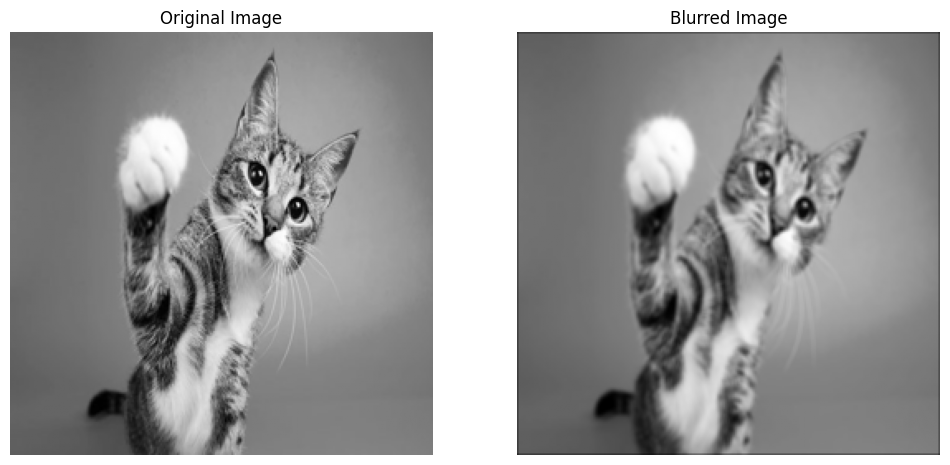

In [42]:
# Load an image using PIL
image_url = "https://t4.ftcdn.net/jpg/02/66/72/41/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("L")
image = image.resize((256,256))
image = np.array(image, dtype=np.float32) / 255.0 # Normalize pixel values

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

blur_filter = np.array([
    [5/8, 5/8, 5/8],
    [5/8, 5/8, 5/8],
    [5/8, 5/8, 5/8]
], dtype=np.float32)

blur_filter = blur_filter.reshape((3, 3, 1, 1))

blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1, 1, 1, 1], padding='SAME')

blurred_image = blurred_image.numpy().squeeze()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()